# Oscillation in eeg 

In [40]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
import pandas as pd 
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns
import scipy as sp
import numpy as np 


import mne 

warnings.filterwarnings('ignore')

In [42]:
sampling_rate = 250 # in seconds
time = 1/sampling_rate
unit_time = 's'

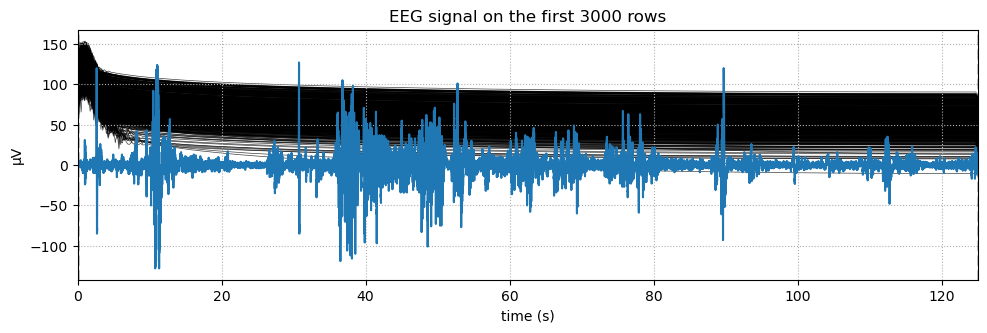

In [68]:
df = pd.read_csv('../../data/EEGArchi13mPFC.txt')
# df = df.iloc[int(start*20_000):int(end*20_000)] 
df['time'] = df.index * time
df.rename(columns={'0': 'µV'}, inplace=True)
plt.plot(df['time'], df['µV'])
plt.xlabel(f'time ({unit_time})')
plt.ylabel('µV')
plt.title('EEG signal on the first 3000 rows')
# plt.savefig("./figures/EEG_signal_all_data.png")
plt.show()

## 1 Plot on the first part of the experiment (before the gap)

In [69]:
def four_s_cutting(path = '../../data/EEGArchi13mPFC.txt') : 
    df = pd.read_csv(path)
    df['time'] = df.index * time
    df.rename(columns={'0': 'mV'}, inplace=True)
    df = df.iloc[int(0*sampling_rate):int(2500*sampling_rate)]
    res = []
    for i in range(0,len(df),1000) :
        try : 
            df_red = df.iloc[i:i+1000]
        except : 
            df_red = df.iloc[i:]

        res.append(df_red)
    return res

### 1.2 Plot with mne 

In [71]:
data_cut = four_s_cutting()
data = np.array([data_cut[i]["mV"] for i in range(len(data_cut))]) ## All the data
# data = np.array([data_cut[i]["mV"] for i in range(50)])
info = mne.create_info(ch_names=['eeg']*625,
                       ch_types=['eeg']*625,
                       sfreq=sampling_rate)

simulated_raw = mne.io.RawArray(data, info)
simulated_raw.plot_psd()
plt.savefig('figures/mne_all_sample.png')

Creating RawArray with float64 data, n_channels=625, n_times=1000
    Range : 0 ... 999 =      0.000 ...     3.996 secs
Ready.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.000 (s)


In [72]:
len(simulated_raw)

1000

## 2. Filtering 

### 2.1 Filter superslow waves 

Creating RawArray with float64 data, n_channels=625, n_times=1000
    Range : 0 ... 999 =      0.000 ...     3.996 secs
Ready.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.000 (s)


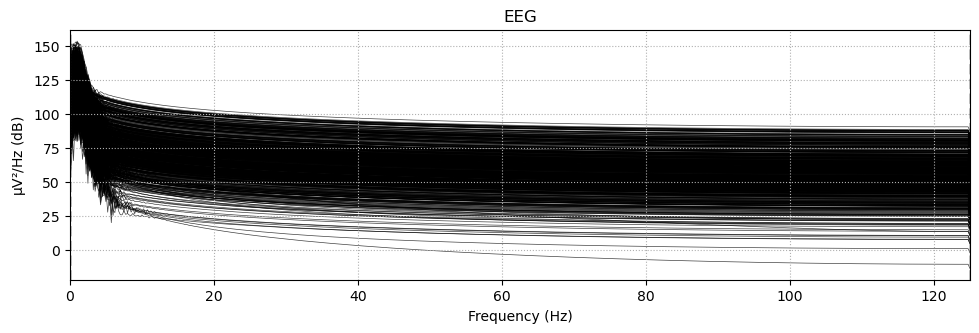

In [64]:
plt.close('all')
def filter_data(data, low, high, sampling_rate) : 
    filtered_data = []
    for i in range(len(data)) : 
        filtered_data.append(sp.signal.filtfilt(sp.signal.butter(3, [low, high], btype='bandpass', fs=sampling_rate)[0], sp.signal.butter(3, [low, high], btype='bandpass', fs=sampling_rate)[1], data[i]))
    return np.array(filtered_data)
data_f = filter_data(data, 0.00001, 1.5, sampling_rate)
simulated_raw_filterd = mne.io.RawArray(data_f, info)
simulated_raw_filterd.plot_psd()

### 2.2 Filter theta waves

Creating RawArray with float64 data, n_channels=625, n_times=1000
    Range : 0 ... 999 =      0.000 ...     3.996 secs
Ready.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.000 (s)


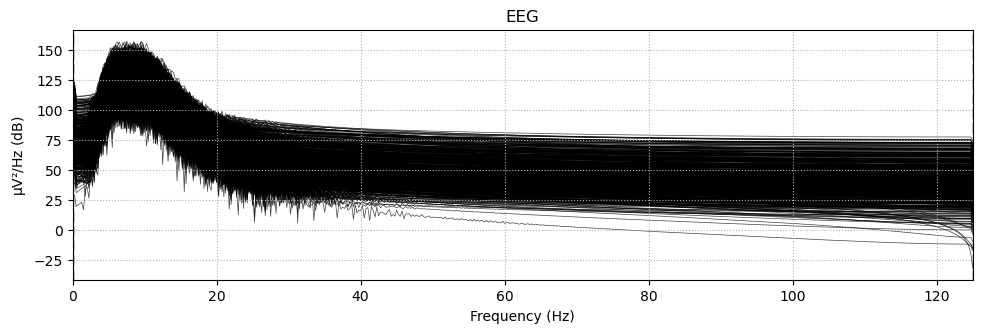

In [47]:
plt.close('all')
data_f = filter_data(data, 5, 12, sampling_rate)
simulated_raw_filterd = mne.io.RawArray(data_f, info)
simulated_raw_filterd.plot_psd()

### 2.3 Filter gamma waves

Creating RawArray with float64 data, n_channels=625, n_times=1000
    Range : 0 ... 999 =      0.000 ...     3.996 secs
Ready.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.000 (s)


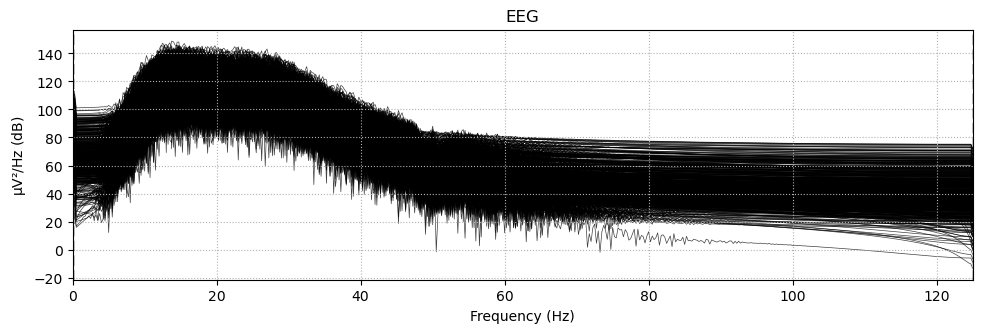

In [48]:
plt.close('all')
data_f = filter_data(data, 12,30, sampling_rate)
simulated_raw_filterd = mne.io.RawArray(data_f, info)
simulated_raw_filterd.plot_psd()

### 2.4 Filter superfast waves

Creating RawArray with float64 data, n_channels=625, n_times=1000
    Range : 0 ... 999 =      0.000 ...     3.996 secs
Ready.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.000 (s)


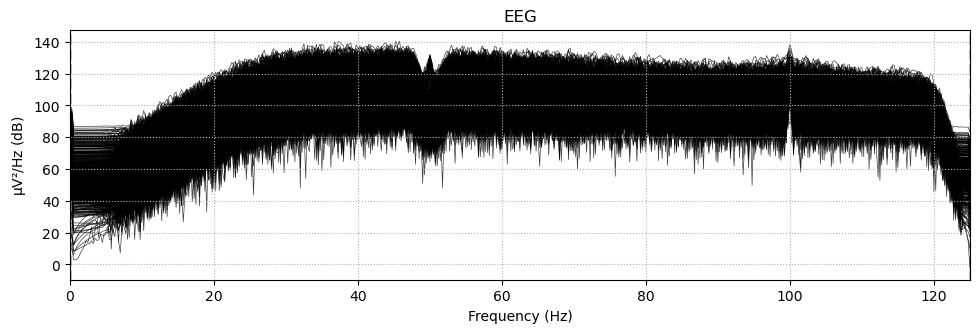

In [49]:
plt.close('all')
data_f = filter_data(data,30,120, sampling_rate)
simulated_raw_filterd = mne.io.RawArray(data_f, info)
simulated_raw_filterd.plot_psd()

### 2.5 plot all the filter on the same graph

Creating RawArray with float64 data, n_channels=625, n_times=1000
    Range : 0 ... 999 =      0.000 ...     3.996 secs
Ready.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.000 (s)
Creating RawArray with float64 data, n_channels=625, n_times=1000
    Range : 0 ... 999 =      0.000 ...     3.996 secs
Ready.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.000 (s)
Creating RawArray with float64 data, n_channels=625, n_times=1000
    Range : 0 ... 999 =      0.000 ...     3.996 secs
Ready.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.000 (s)
Creating RawArray with float64 data, n_channels=625, n_times=1000
    Range : 0 ... 999 =      0.000 ...     3.996 secs
Ready.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.000 (s)


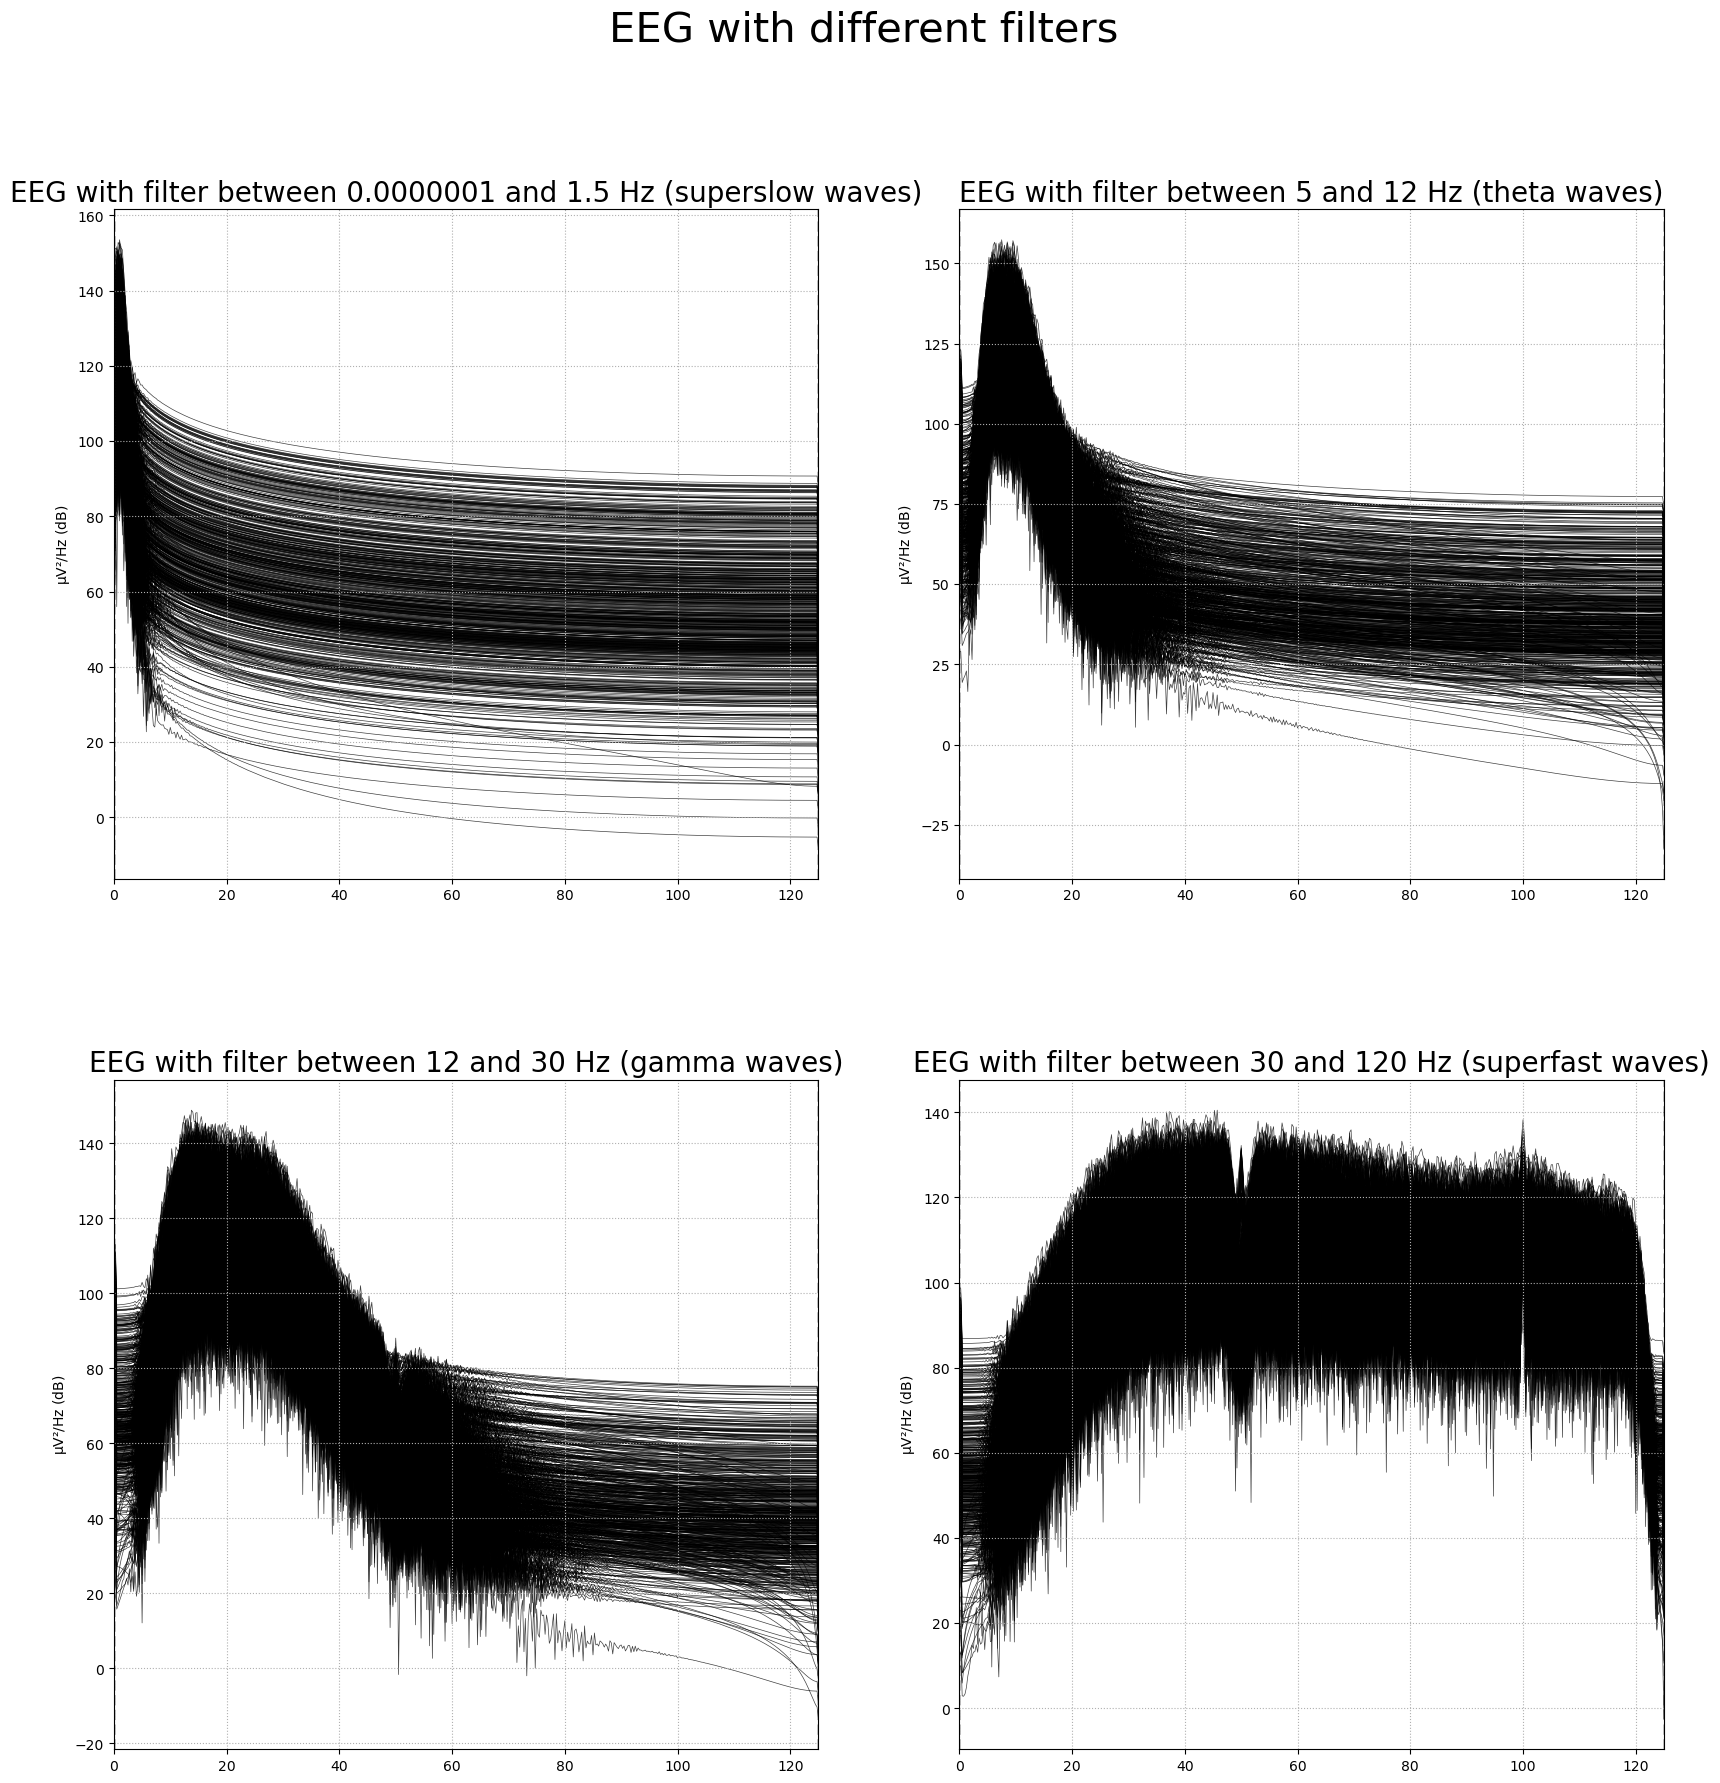

In [50]:
plt.close('all')
fig,ax = plt.subplots(2,2,figsize=(20,20))
data_f = filter_data(data,0.0000001,1.5, sampling_rate)
simulated_raw_filterd = mne.io.RawArray(data_f, info)
simulated_raw_filterd.plot_psd(ax=ax[0,0])
ax[0,0].set_title("EEG with filter between 0.0000001 and 1.5 Hz (superslow waves)",fontsize=20)

data_f = filter_data(data,5,12, sampling_rate)
simulated_raw_filterd = mne.io.RawArray(data_f, info)
simulated_raw_filterd.plot_psd(ax=ax[0,1])
ax[0,1].set_title("EEG with filter between 5 and 12 Hz (theta waves)",fontsize=20)

data_f = filter_data(data,12,30, sampling_rate)
simulated_raw_filterd = mne.io.RawArray(data_f, info)
simulated_raw_filterd.plot_psd(ax=ax[1,0])
ax[1,0].set_title("EEG with filter between 12 and 30 Hz (gamma waves)",fontsize=20)

data_f = filter_data(data,30,120, sampling_rate)
simulated_raw_filterd = mne.io.RawArray(data_f, info)
simulated_raw_filterd.plot_psd(ax=ax[1,1])
ax[1,1].set_title("EEG with filter between 30 and 120 Hz (superfast waves)",fontsize=20)

plt.suptitle("EEG with different filters",fontsize=30)
plt.savefig("./figures/EEG_with_different_filters.png",dpi=500)
plt.show()

How to determine the dominant wave ?

## 3. Heatmap

### 3.1 Heatmap on the first part of the experiment (before the gap)

Effective window size : 1.024 (s)


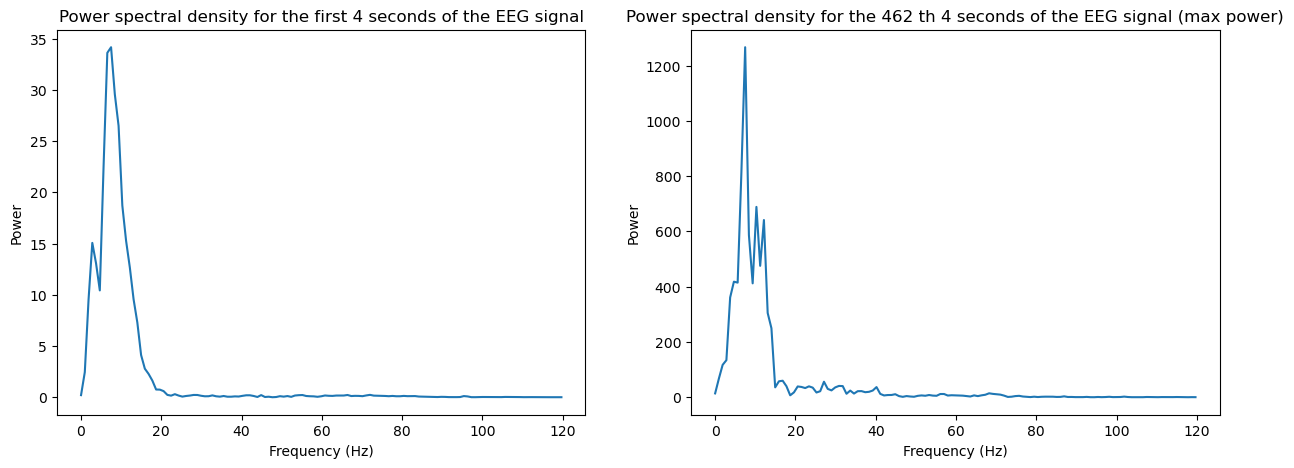

In [51]:
plt.close('all')
frequencies = np.arange(0, 120, 0.935)
# power = mne.time_frequency.psd_welch(
#     simulated_raw, 
#     fmin=0, 
#     fmax=120,
#     n_fft=1000, 
#     n_overlap=0, 
#     n_per_seg=1000,
#     n_jobs=1, 
#     verbose=None
#     ) # Compute the psd for all the slices of 4 seconds of the data

power = simulated_raw.compute_psd()
fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(frequencies, power[0][0], label='PSD')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('Power')
ax[0].set_title('Power spectral density for the first 4 seconds of the EEG signal')

ax[1].plot(frequencies, power[462][0], label='PSD')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Power')
ax[1].set_title('Power spectral density for the 462 th 4 seconds of the EEG signal (max power)')

plt.show()

### 3.2 plot the heatmap

To do the heatmap we need to have the a df like this :

time| 4 | 8 
---|---|---
freq |   power |  power
...  |   ...    | ...

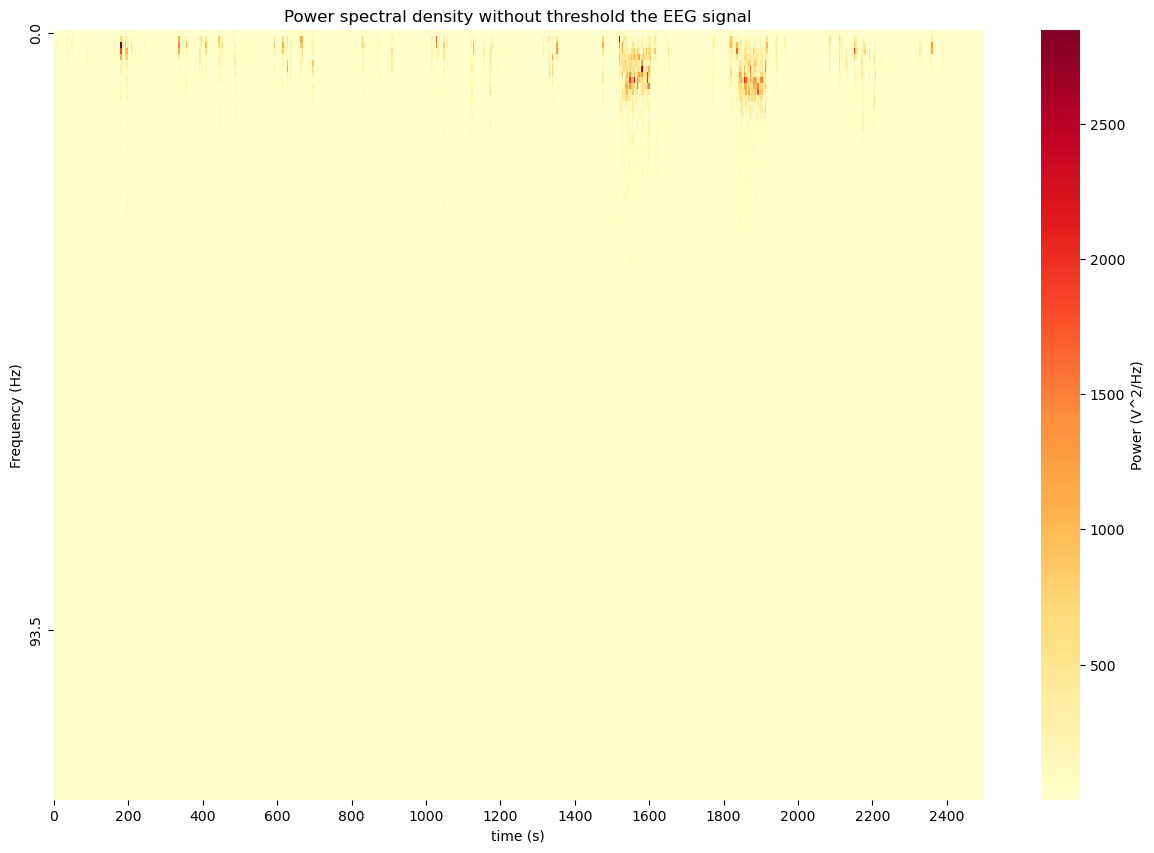

In [73]:
plt.close('all')
plt.figure(figsize=(15,10))
htmap = pd.DataFrame(power[0])
htmap = htmap.T
for i in range(1,len(data)) : 
    htmap[i] = power[i][0]
htmap = htmap.rename(columns=dict((i,i*4) for i in range(len(data))))
htmap
htmap["freq"] = frequencies
htmap = htmap.set_index("freq", drop=True)
sns.heatmap(htmap, cmap="YlOrRd", xticklabels=50, yticklabels=100, cbar_kws={'label': 'Power (V^2/Hz)'})
plt.xlabel('time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Power spectral density without threshold the EEG signal')
# plt.savefig("./figures/heatmap_no_thr.png")
plt.show()

In [65]:
htmap

0         4           8          12        16        20    \
freq                                                                      
0.000     0.206277  0.254522    3.362772   3.374414  0.224635  0.061707   
0.935     2.449298  0.981162   60.813449  33.850243  0.346025  0.287161   
1.870     9.530873  0.413983  191.104323  34.960330  0.629052  0.154808   
2.805    15.064909  0.327420   71.967592  14.163124  0.441110  0.788577   
3.740    13.062945  0.553410    4.170746   1.122565  0.781946  0.269992   
...            ...       ...         ...        ...       ...       ...   
115.940   0.003630  0.001799    0.042426   0.002827  0.004328  0.007099   
116.875   0.004405  0.001766    0.023292   0.010566  0.007967  0.008668   
117.810   0.004952  0.004044    0.038962   0.022814  0.004006  0.006973   
118.745   0.008520  0.010047    0.062452   0.011805  0.007446  0.003969   
119.680   0.004171  0.008045    0.029245   0.002158  0.003467  0.001663   

             24         28         32          36    ...       1960  \
freq                                                 ...              
0.000    0.754384   0.182863   0.246225   82.272801  ...   1.211234   
0.935    3.376549   2.360694   6.671124  296.897983  ...  18.988562   
1.870    4.505309   5.479158  11.496441  192.189563  ...  37.767822   
2.805    4.532933   5.707037  27.410662  178.293061  ...  56.687675   
3.740    2.402836  21.893796  11.086757  144.913389  ...  57.355806   
...           ...        ...        ...         ...  ...        ...   
115.940  0.001622   0.002963   0.001832    0.037292  ...   0.007448   
116.875  0.005806   0.009984   0.005829    0.042084  ...   0.011742   
117.810  0.003001   0.005034   0.004729    0.055790  ...   0.008075   
118.745  0.005305   0.008307   0.001798    0.071816  ...   0.013574   
119.680  0.002415   0.008615   0.001698    0.005743  ...   0.011107   

               1964       1968      1972      1976       1980       1984  \
freq                                                                       
0.000      8.967512   5.778480  0.153315  0.064898   0.477100   2.285747   
0.935    277.078422  16.363673  0.910385  0.731513   0.527189  16.743722   
1.870    252.226972  19.673052  0.442274  0.490418  15.223132  11.227319   
2.805    131.888791  19.191852  0.129210  0.637223  12.221805   5.278056   
3.740     53.594690   9.929965  0.064948  1.410498   2.283279   4.791483   
...             ...        ...       ...       ...        ...        ...   
115.940    0.010210   0.005470  0.004516  0.004261   0.042619   0.001930   
116.875    0.012830   0.011312  0.003467  0.004491   0.047675   0.003778   
117.810    0.032330   0.003226  0.004200  0.005149   0.057555   0.012267   
118.745    0.035420   0.002820  0.004496  0.010105   0.038280   0.010604   
119.680    0.005148   0.002678  0.001642  0.003108   0.010496   0.003588   

              1988      1992      1996  
freq                                    
0.000     3.231324  0.150627  0.430097  
0.935    18.195035  1.395064  1.310855  
1.870    11.522645  1.562231  0.411409  
2.805    14.341523  0.685501  0.603411  
3.740    20.299999  0.571490  0.606838  
...            ...       ...       ...  
115.940   0.023932  0.005750  0.001146  
116.875   0.011850  0.001149  0.002971  
117.810   0.007192  0.002775  0.005257  
118.745   0.007050  0.003070  0.009135  
119.680   0.006450  0.000833  0.003492  

[129 rows x 500 columns]

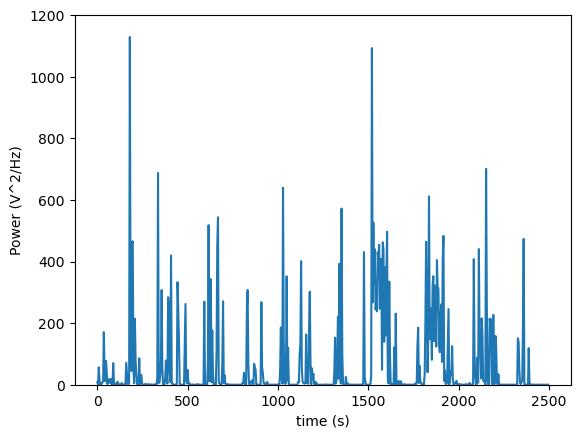

In [74]:
multiple_lists = [htmap.iloc[[0]].values.flatten().tolist(), htmap.iloc[[1]].values.flatten().tolist(), htmap.iloc[[2]].values.flatten().tolist(), htmap.iloc[[3]].values.flatten().tolist(), htmap.iloc[[4]].values.flatten().tolist(), htmap.iloc[[5]].values.flatten().tolist()]
arrays = [np.array(x) for x in multiple_lists]
List05 = [np.mean(k) for k in zip(*arrays)]


plt.plot(htmap.columns.tolist(), List05)
plt.xlabel('time (s)')
plt.ylabel('Power (V^2/Hz)')
plt.ylim(0, 1200)
plt.show()

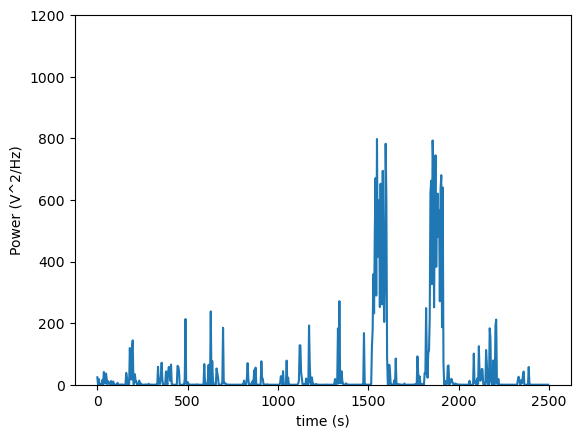

In [75]:
multiple_lists = [htmap.iloc[[x]].values.flatten().tolist() for x in range(6, 14)]
arrays = [np.array(x) for x in multiple_lists]
List512 = [np.mean(k) for k in zip(*arrays)]

plt.plot(htmap.columns.tolist(), List512)
plt.ylim(0, 1200)
plt.xlabel('time (s)')
plt.ylabel('Power (V^2/Hz)')
plt.show()

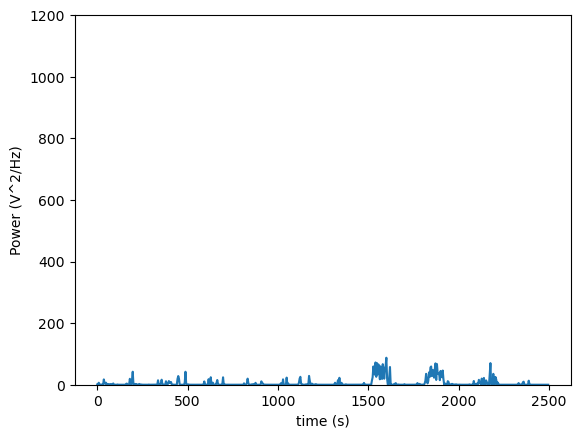

In [76]:
multiple_lists = [htmap.iloc[[x]].values.flatten().tolist() for x in range(14, 34)]
arrays = [np.array(x) for x in multiple_lists]
List1230 = [np.mean(k) for k in zip(*arrays)]

plt.plot(htmap.columns.tolist(), List1230)
plt.ylim(0, 1200)
plt.xlabel('time (s)')
plt.ylabel('Power (V^2/Hz)')
plt.show()

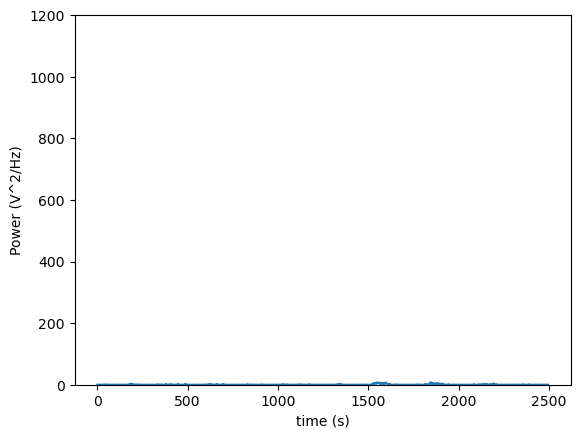

In [77]:
multiple_lists = [htmap.iloc[[x]].values.flatten().tolist() for x in range(34, 129)]
arrays = [np.array(x) for x in multiple_lists]
List30 = [np.mean(k) for k in zip(*arrays)]

plt.plot(htmap.columns.tolist(), List30)
plt.ylim(0, 1200)
plt.xlabel('time (s)')
plt.ylabel('Power (V^2/Hz)')
plt.show()

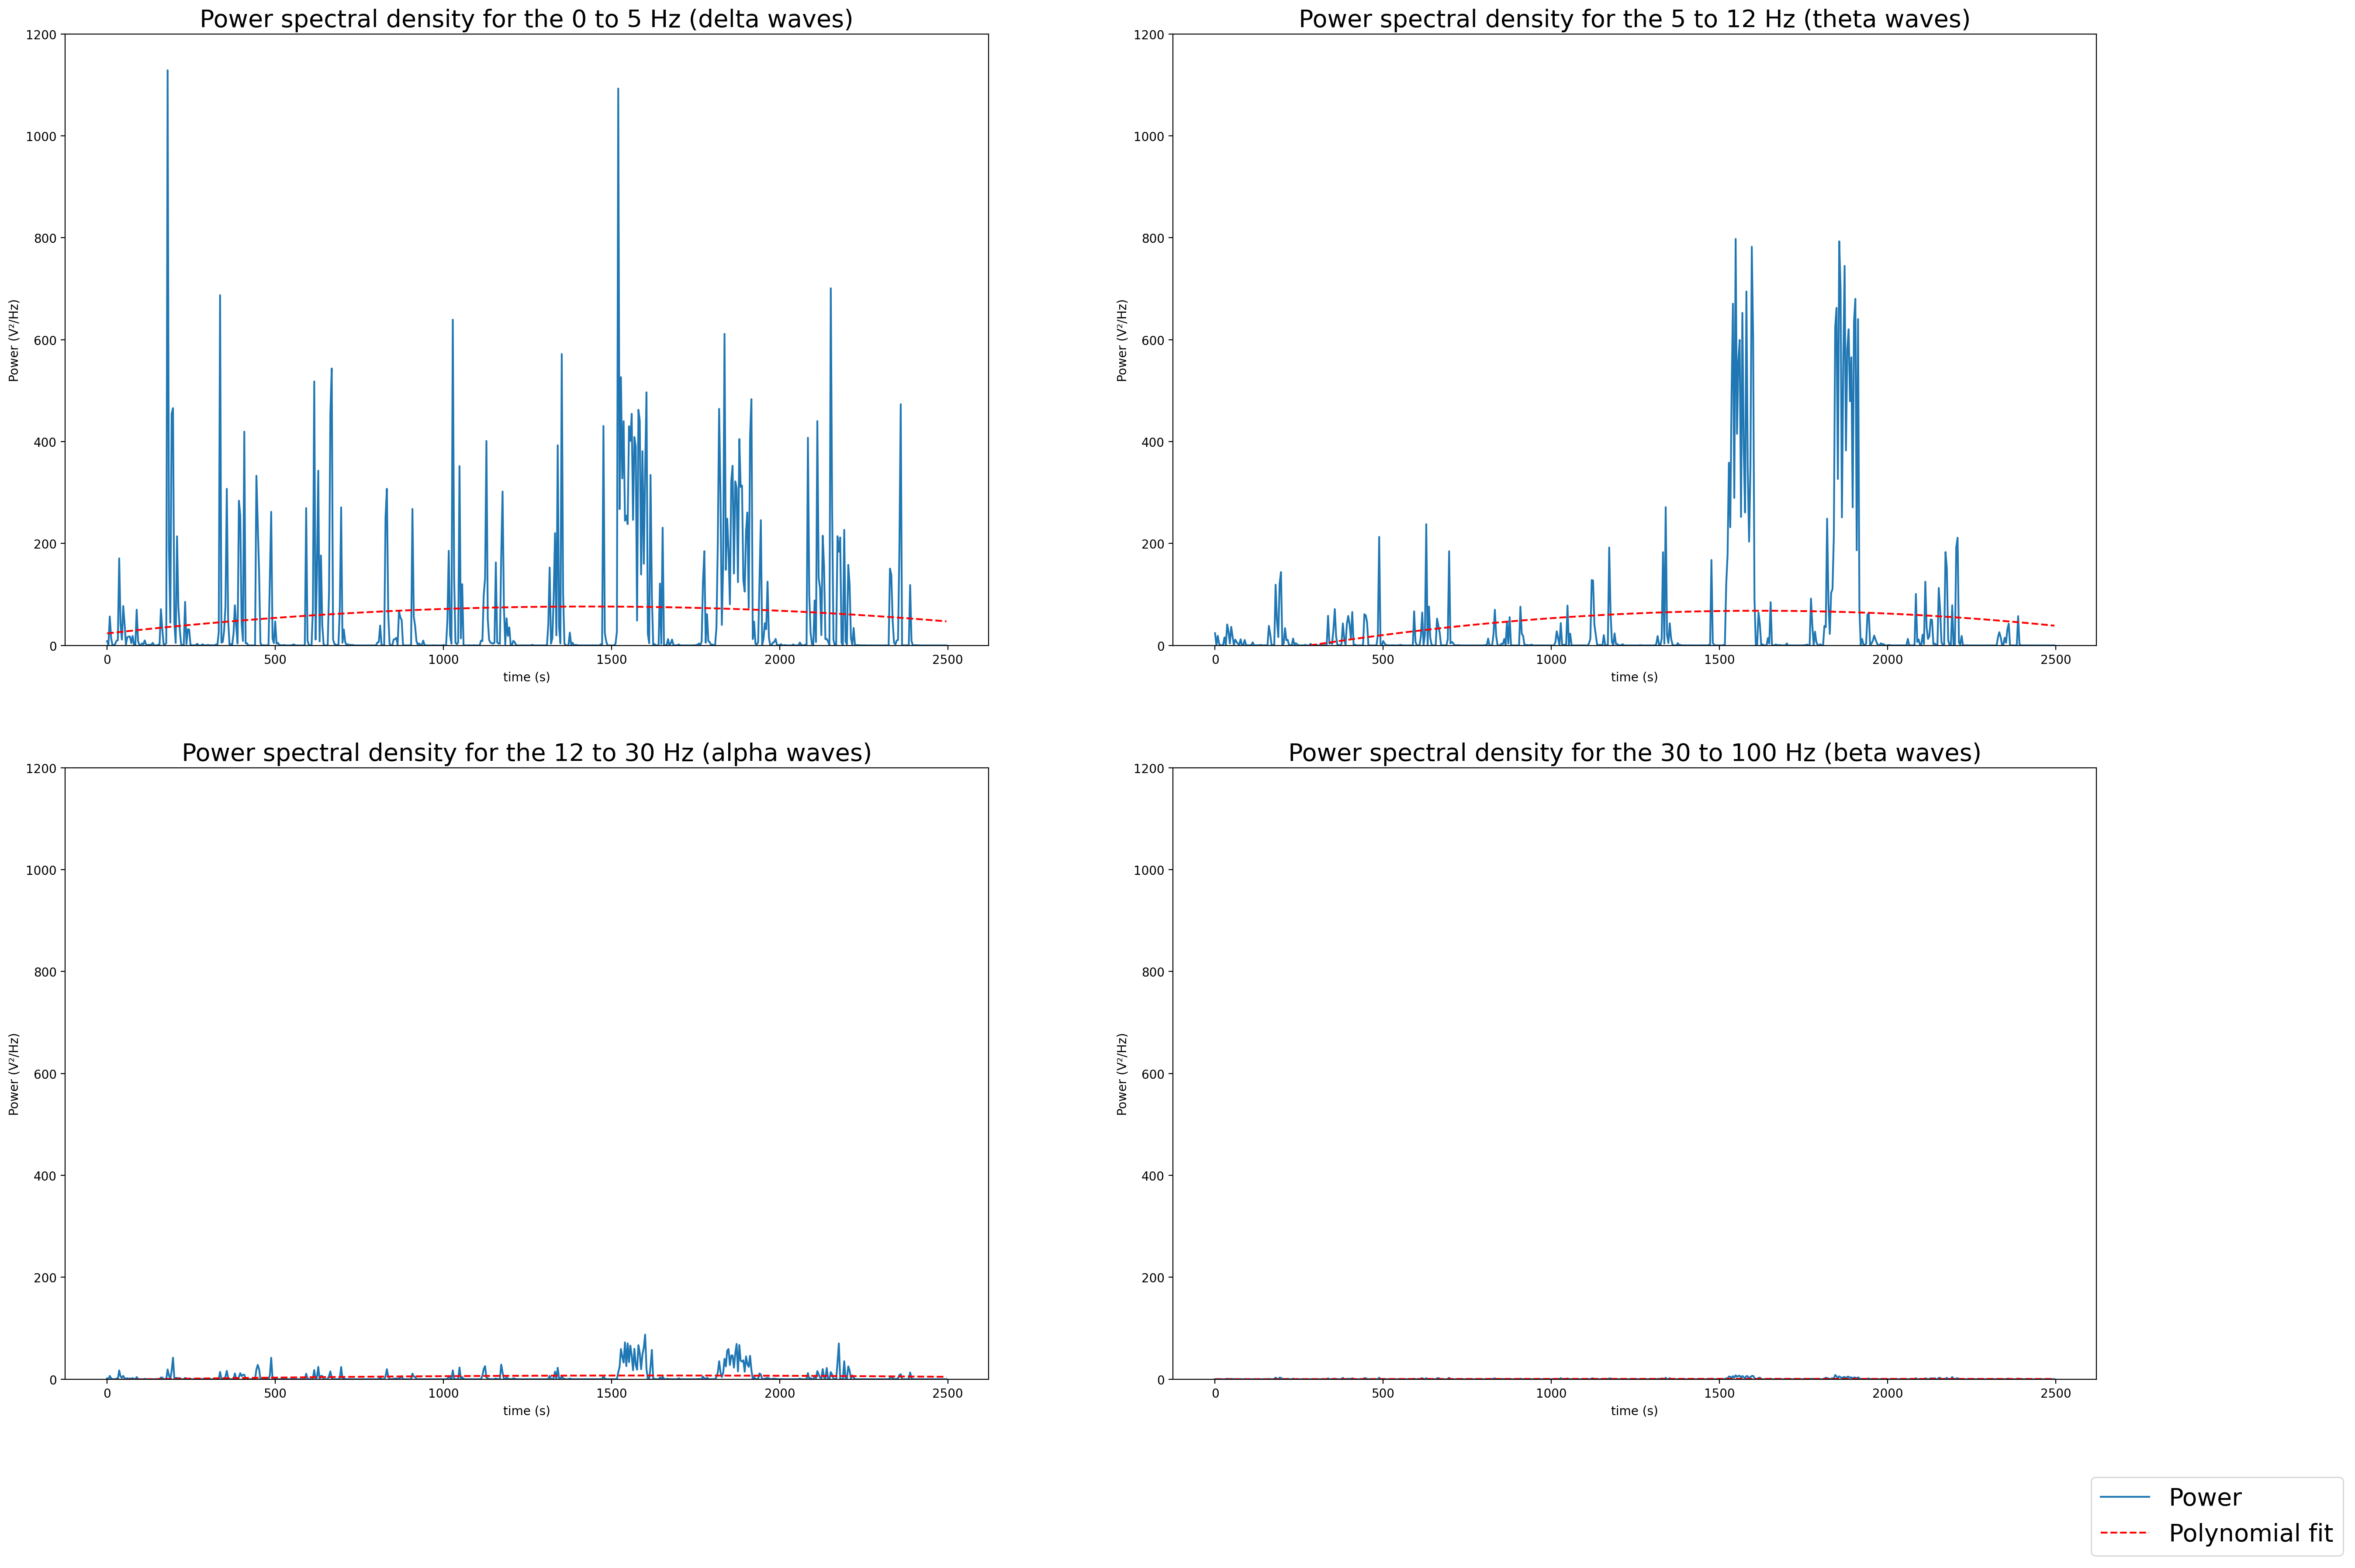

In [78]:
plt.close('all')
fig,ax = plt.subplots(2,2, figsize=(30,20), dpi = 200)
ax[0,0].plot(htmap.columns.tolist(), List05)
z = np.polyfit(htmap.columns.tolist(), List05, 2)
p = np.poly1d(z)
ax[0,0].plot(htmap.columns.tolist(), p(htmap.columns.tolist()), "r--")
ax[0,0].set_xlabel('time (s)')
ax[0,0].set_ylabel('Power (V\u00b2/Hz)')
ax[0,0].set_ylim(0, 1200)
ax[0,0].set_title("Power spectral density for the 0 to 5 Hz (delta waves)",fontsize=20)

ax[0,1].plot(htmap.columns.tolist(), List512)
z = np.polyfit(htmap.columns.tolist(), List512, 2)
p = np.poly1d(z)
ax[0,1].plot(htmap.columns.tolist(), p(htmap.columns.tolist()), "r--")
ax[0,1].set_ylim(0, 1200)
ax[0,1].set_xlabel('time (s)')
ax[0,1].set_ylabel('Power (V\u00b2/Hz)')
ax[0,1].set_title("Power spectral density for the 5 to 12 Hz (theta waves)",fontsize=20)

ax[1,0].plot(htmap.columns.tolist(), List1230)
z = np.polyfit(htmap.columns.tolist(), List1230, 2)
p = np.poly1d(z)
ax[1,0].plot(htmap.columns.tolist(), p(htmap.columns.tolist()), "r--")
ax[1,0].set_ylim(0, 1200)
ax[1,0].set_xlabel('time (s)')
ax[1,0].set_ylabel('Power (V\u00b2/Hz)')
ax[1,0].set_title("Power spectral density for the 12 to 30 Hz (alpha waves)",fontsize=20)

ax[1,1].plot(htmap.columns.tolist(), List30)
z = np.polyfit(htmap.columns.tolist(), List30, 2)
p = np.poly1d(z)
ax[1,1].plot(htmap.columns.tolist(), p(htmap.columns.tolist()), "r--")
ax[1,1].set_ylim(0, 1200)
ax[1,1].set_xlabel('time (s)')
ax[1,1].set_ylabel('Power (V\u00b2/Hz)')
ax[1,1].set_title("Power spectral density for the 30 to 100 Hz (beta waves)",fontsize=20)
fig.legend(['Power','Polynomial fit'], loc='lower right', fontsize=20)
plt.show()

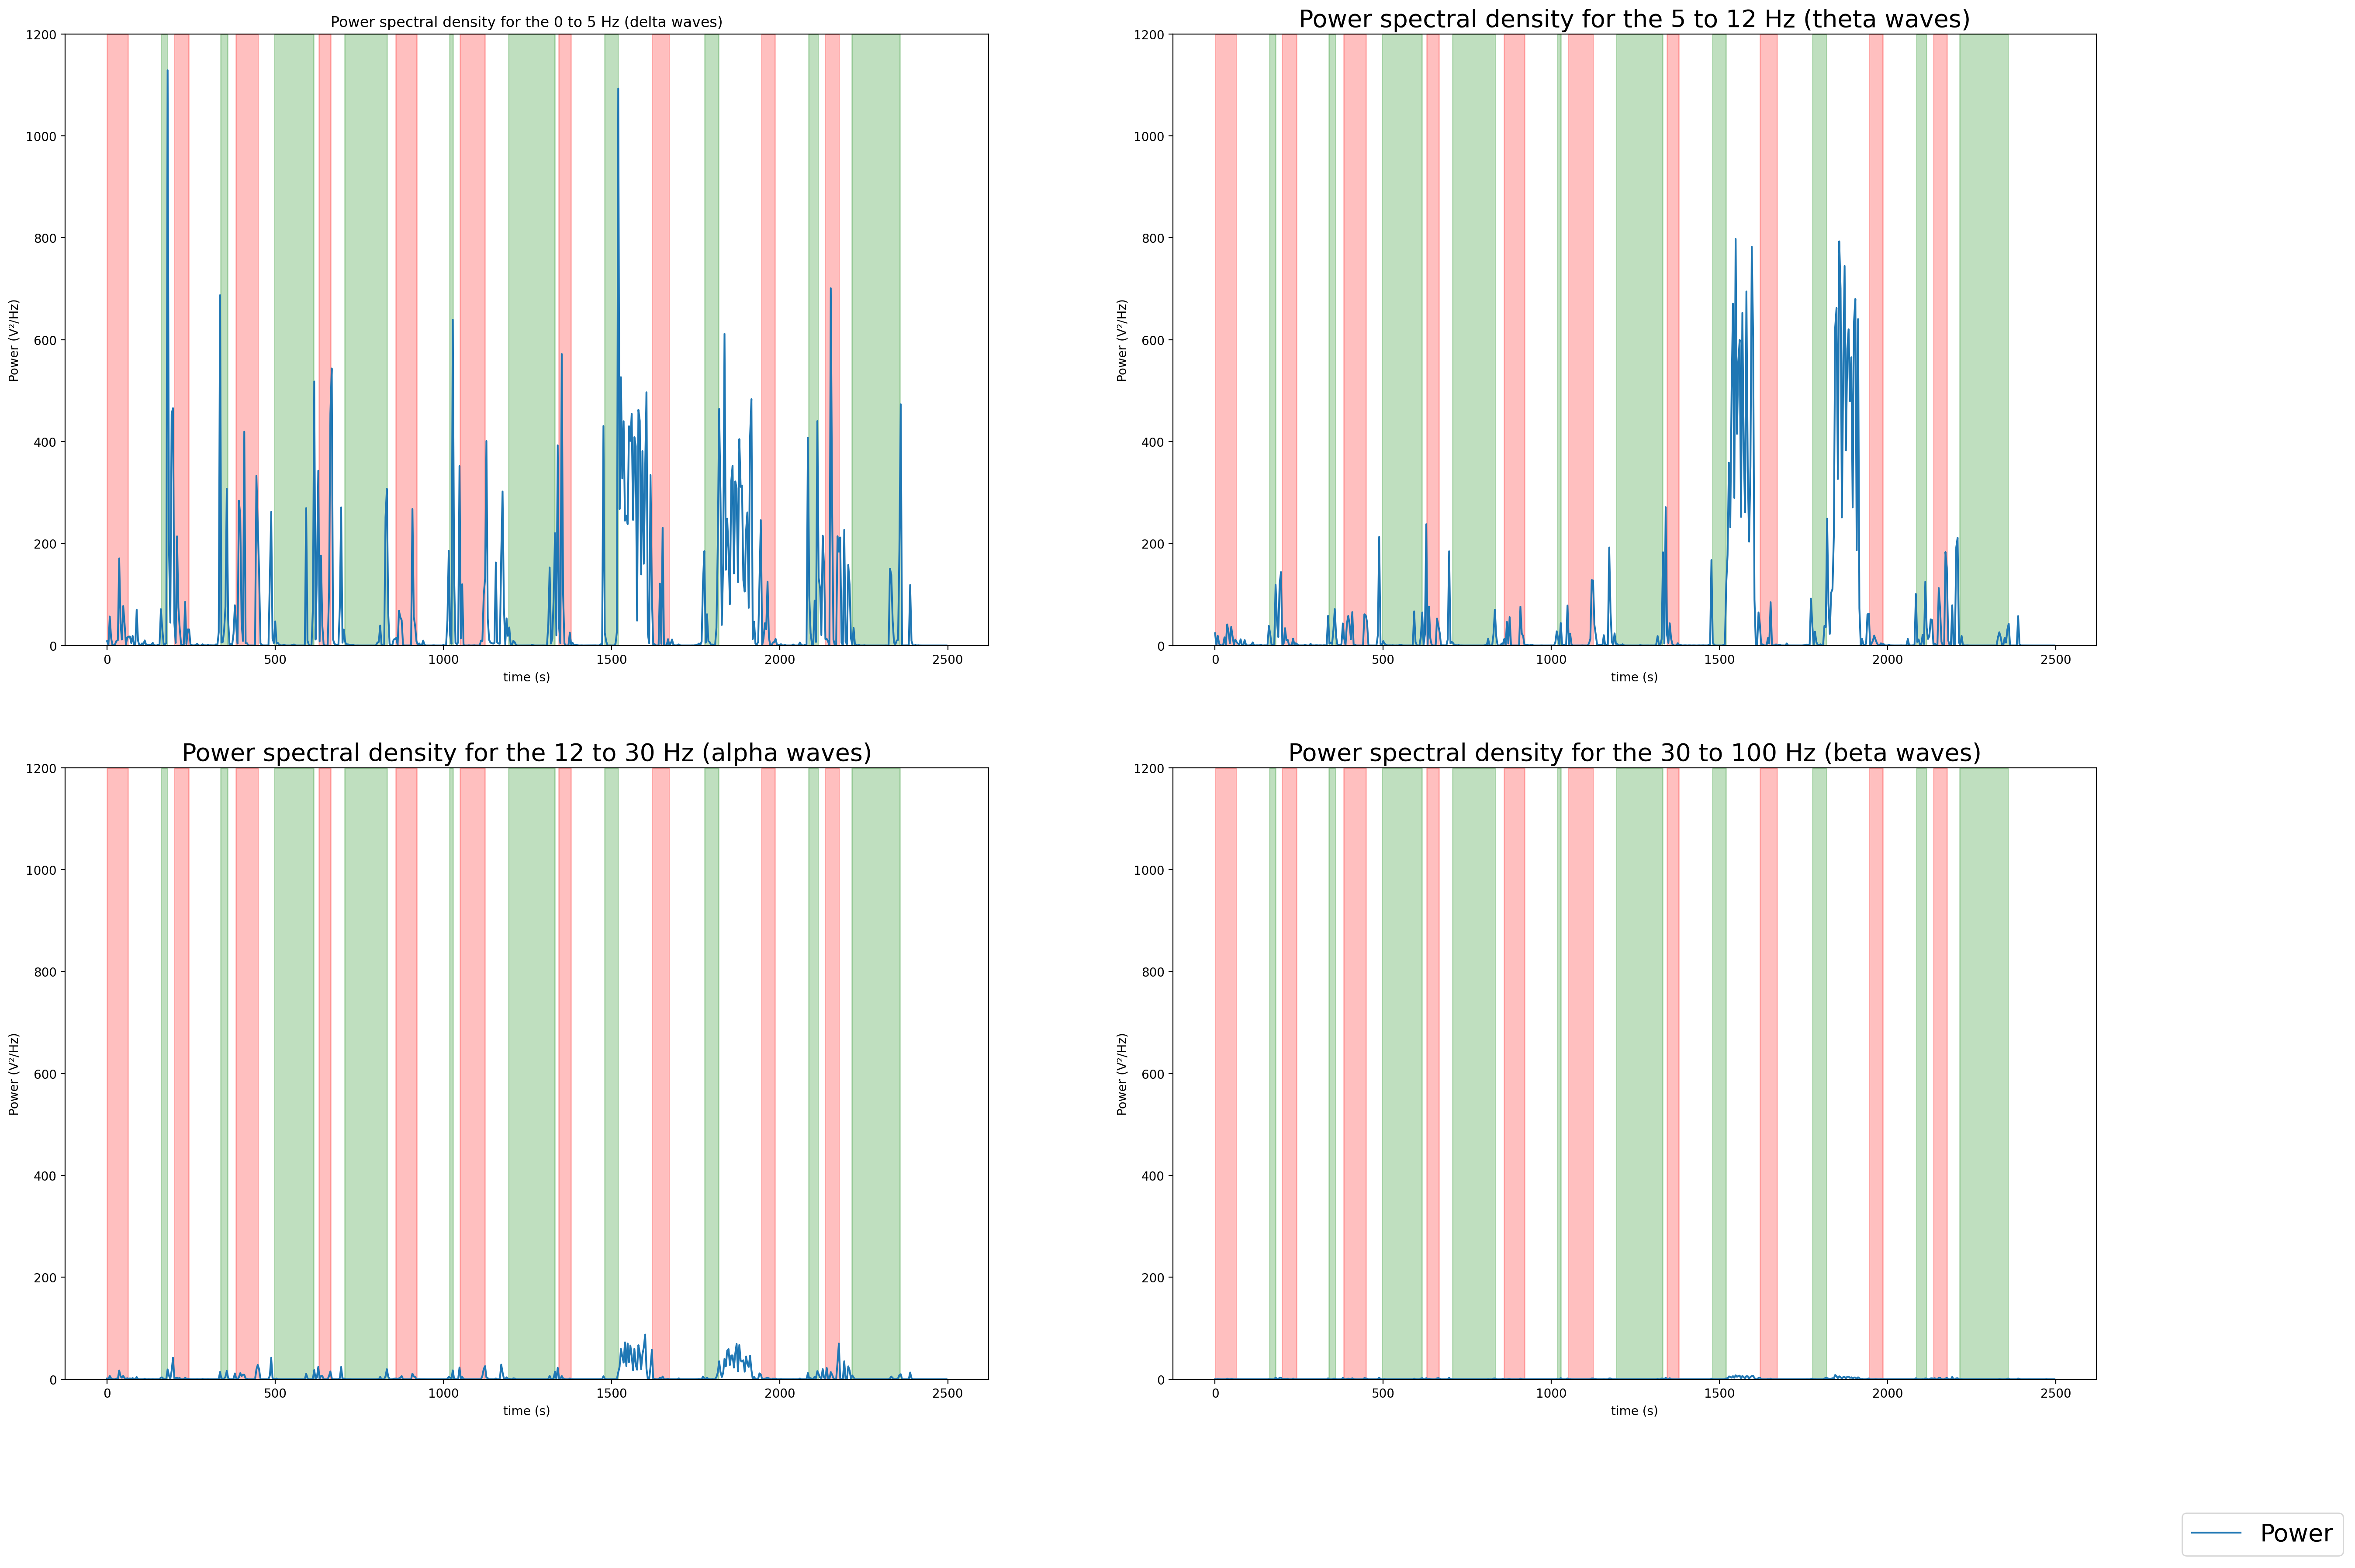

In [88]:
plt.close('all')
sampleStart = [int(_) for _ in [0.02, 199.78, 382.94, 629.5, 859.06, 1049.9, 1343.58, 1620.9, 1945.08, 2135.96]]
sampleEnd = [int(_) for _ in [161.32, 338.2, 496.86, 706.52, 1018.4, 1193.28, 1478.86, 1776.84, 2086.1, 2214.0,]]
# print(type(sampleEnd))
samplePhase = [(0.02, 62.78), (199.78, 242.64), (382.94, 449.02), (629.5, 665.46), (859.06, 920.34), (1049.9, 1123.96), (1343.58, 1379.16), (1620.9, 1671.3), (1945.08, 1985.68), (2135.96, 2176.46)]
choicePhase = [(161.32, 179.6), (338.2, 358.0), (496.86, 614.74), (706.52, 832.84), (1018.4, 1028.72), (1193.28, 1330.66), (1478.86, 1519.26), (1776.84, 1818.26), (2086.1, 2115.04), (2214.0, 2358.0)]

fig,ax = plt.subplots(2,2, figsize=(30,20), dpi = 200)
ax[0,0].plot(htmap.columns.tolist(), List05, label='Power')
# ax[0,0].vlines(sampleStart, 0, 1200, colors='r', linestyles='dashed', label='Start of choice')
# ax[0,0].vlines(sampleEnd, 0, 1200, colors='g', linestyles='dashed', label='End of choice')


for sample in samplePhase :

    ax[0,0].axvspan(sample[0], sample[1], alpha=0.25, color='red',  )

for choice in choicePhase :
    ax[0,0].axvspan(choice[0],choice[1] ,alpha=0.25, color='green',)

ax[0,0].set_xlabel('time (s)')
ax[0,0].set_ylabel('Power (V\u00b2/Hz)')
ax[0,0].set_ylim(0, 1200)
ax[0,0].set_title("Power spectral density for the 0 to 5 Hz (delta waves)",)

ax[0,1].plot(htmap.columns.tolist(), List512)
# ax[0,1].vlines(sampleStart, 0, 1200, colors='r', linestyles='dashed')
# ax[0,1].vlines(sampleEnd, 0, 1200, colors='g', linestyles='dashed')
for sample in samplePhase :

    ax[0,1].axvspan(sample[0], sample[1], alpha=0.25, color='red',  )

for choice in choicePhase :
    ax[0,1].axvspan(choice[0],choice[1] ,alpha=0.25, color='green',)
ax[0,1].set_ylim(0, 1200)
ax[0,1].set_xlabel('time (s)')
ax[0,1].set_ylabel('Power (V\u00b2/Hz)')
ax[0,1].set_title("Power spectral density for the 5 to 12 Hz (theta waves)",fontsize=20)

ax[1,0].plot(htmap.columns.tolist(), List1230)
# ax[1,0].vlines(sampleStart, 0, 1200, colors='r', linestyles='dashed')
# ax[1,0].vlines(sampleEnd, 0, 1200, colors='g', linestyles='dashed')
for sample in samplePhase :

    ax[1,0].axvspan(sample[0], sample[1], alpha=0.25, color='red',  )

for choice in choicePhase :
    ax[1,0].axvspan(choice[0],choice[1] ,alpha=0.25, color='green',)
ax[1,0].set_ylim(0, 1200)
ax[1,0].set_xlabel('time (s)')
ax[1,0].set_ylabel('Power (V\u00b2/Hz)')
ax[1,0].set_title("Power spectral density for the 12 to 30 Hz (alpha waves)",fontsize=20)

ax[1,1].plot(htmap.columns.tolist(), List30)
# ax[1,1].vlines(sampleStart, 0, 1200, colors='r', linestyles='dashed')
# ax[1,1].vlines(sampleEnd, 0, 1200, colors='g', linestyles='dashed')
for sample in samplePhase :

    ax[1,1].axvspan(sample[0], sample[1], alpha=0.25, color='red',  )

for choice in choicePhase :
    ax[1,1].axvspan(choice[0],choice[1] ,alpha=0.25, color='green',)
ax[1,1].set_ylim(0, 1200)
ax[1,1].set_xlabel('time (s)')
ax[1,1].set_ylabel('Power (V\u00b2/Hz)')
ax[1,1].set_title("Power spectral density for the 30 to 100 Hz (beta waves)",fontsize=20)
fig.legend(loc='lower right', fontsize=20)
plt.show()

### 3.3 Set a threshold to the heatmap (500 dB)

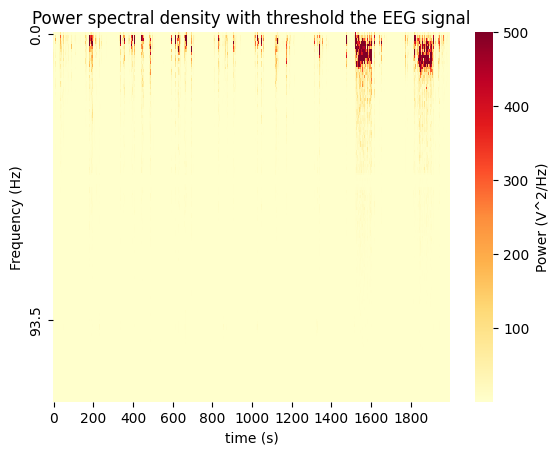

In [15]:
htmap[htmap > 500] = 500
sns.heatmap(htmap, cmap="YlOrRd", xticklabels=50, yticklabels=100, cbar_kws={'label': 'Power (V^2/Hz)'})
plt.xlabel('time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Power spectral density with threshold the EEG signal')
# plt.savefig("./figures/heatmap_thr.png")
plt.show()

## Applying a gaussian filter to smooth out the heatmap patches 

(for nicer visualisation, causing a bit of accuracy loss)

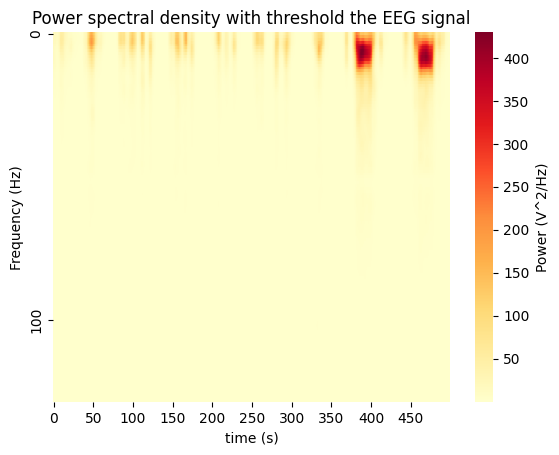

In [16]:
from scipy.ndimage.filters import gaussian_filter
htmap_smooth = gaussian_filter(htmap, sigma=2)
sns.heatmap(htmap_smooth, cmap="YlOrRd", xticklabels=50, yticklabels=100, cbar_kws={'label': 'Power (V^2/Hz)'})
plt.xlabel('time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Power spectral density with threshold the EEG signal')
# plt.savefig("./figures/heatmap_thr.png")
plt.show()


Strange because we get only theta waves 

Should we apply a max value for the PSD ? bc 5000 is very huge

### 3.4 Zoom on the heatmap threshold  

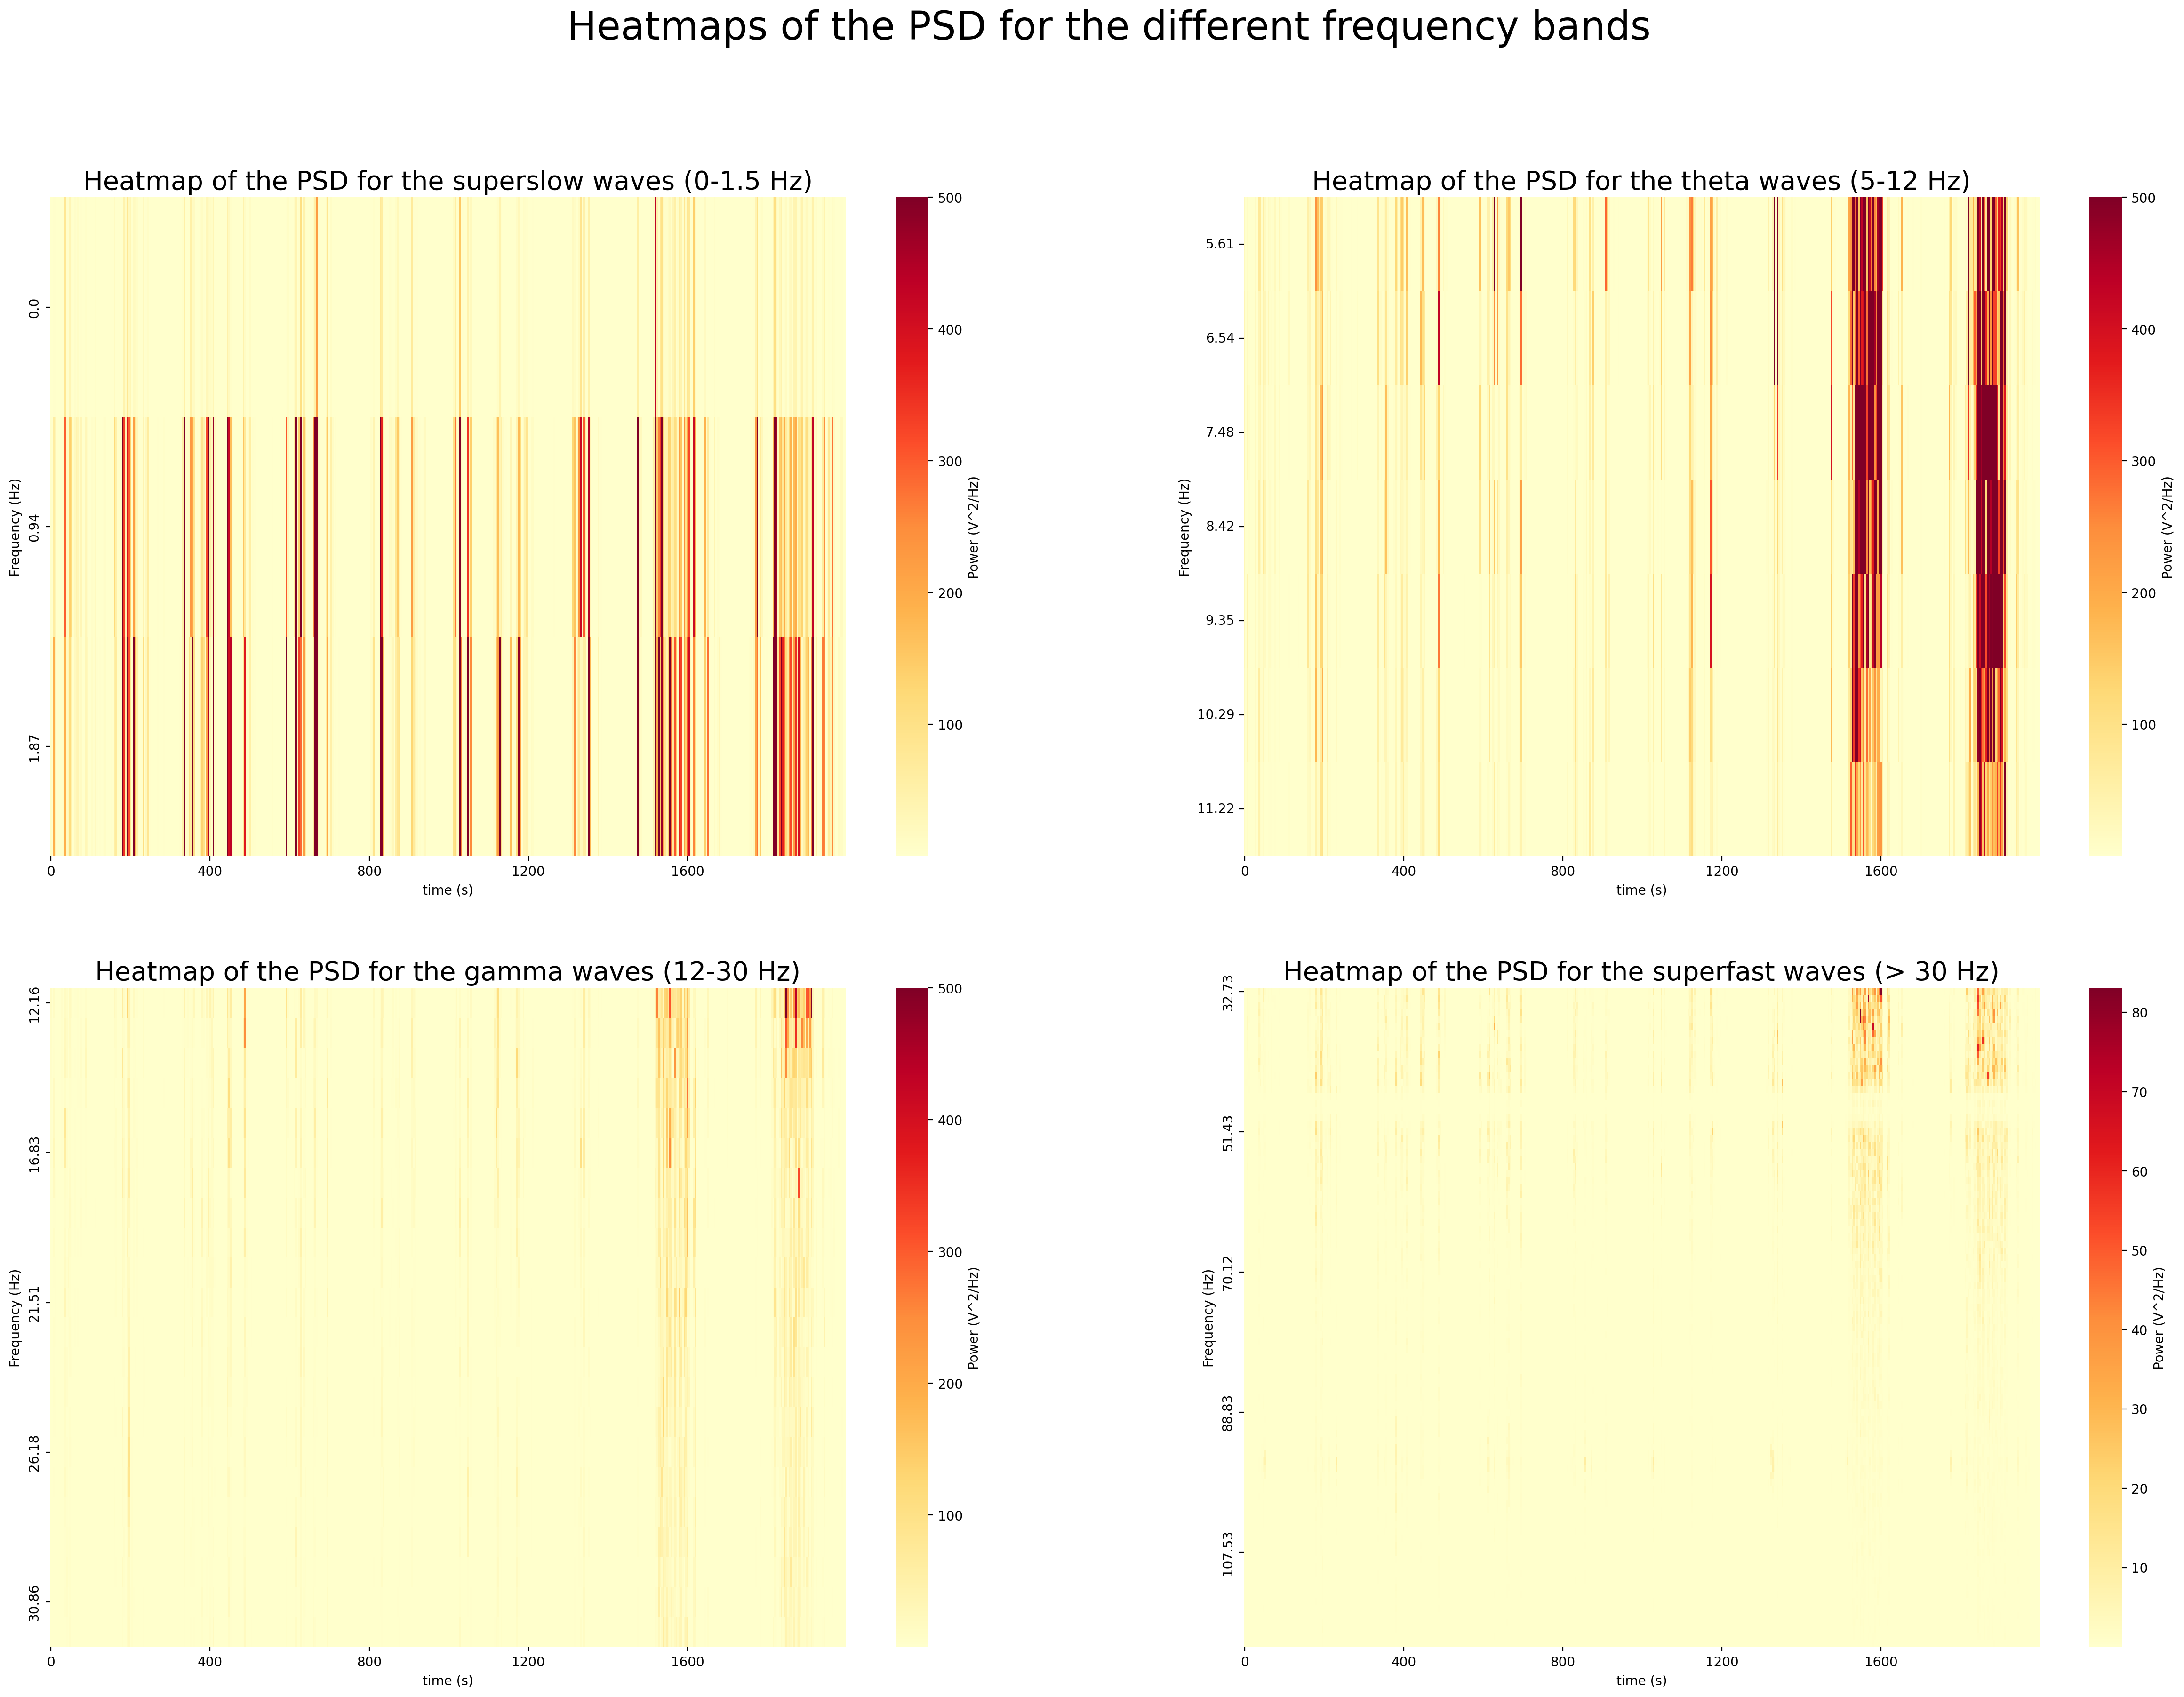

In [17]:
plt.close('all')
fig,ax = plt.subplots(2,2, figsize=(30,20), dpi = 200)

htmap_zoom = htmap.iloc[:3, :]
sns.heatmap(htmap_zoom, cmap="YlOrRd", xticklabels=100, yticklabels=1, cbar_kws={'label': 'Power (V^2/Hz)'}, ax=ax[0,0])
ax[0,0].set_xlabel('time (s)')
ax[0,0].set_ylabel('Frequency (Hz)')
ax[0,0].set_title('Heatmap of the PSD for the superslow waves (0-1.5 Hz)', fontsize=20)
labels = [item.get_text() for item in ax[0,0].get_yticklabels()]
ax[0,0].set_yticklabels([str(round(float(label), 2)) for label in labels])


htmap_zoom = htmap.iloc[6:13, :]
sns.heatmap(htmap_zoom, cmap="YlOrRd", xticklabels=100, yticklabels=1, cbar_kws={'label': 'Power (V^2/Hz)'}, ax=ax[0,1])
ax[0,1].set_xlabel('time (s)')
ax[0,1].set_ylabel('Frequency (Hz)')
ax[0,1].set_title('Heatmap of the PSD for the theta waves (5-12 Hz)', fontsize=20)
labels = [item.get_text() for item in ax[0,1].get_yticklabels()]
ax[0,1].set_yticklabels([str(round(float(label), 2)) for label in labels])

htmap_zoom = htmap.iloc[13:35, :]
sns.heatmap(htmap_zoom, cmap="YlOrRd", xticklabels=100, yticklabels=5, cbar_kws={'label': 'Power (V^2/Hz)'}, ax=ax[1,0])
ax[1,0].set_xlabel('time (s)')
ax[1,0].set_ylabel('Frequency (Hz)')
ax[1,0].set_title('Heatmap of the PSD for the gamma waves (12-30 Hz)', fontsize=20)
labels = [item.get_text() for item in ax[1,0].get_yticklabels()]
ax[1,0].set_yticklabels([str(round(float(label), 2)) for label in labels])

htmap_zoom = htmap.iloc[35:, :]
sns.heatmap(htmap_zoom, cmap="YlOrRd", xticklabels=100, yticklabels=20, cbar_kws={'label': 'Power (V^2/Hz)'}, ax=ax[1,1])
ax[1,1].set_xlabel('time (s)')
ax[1,1].set_ylabel('Frequency (Hz)')
ax[1,1].set_title('Heatmap of the PSD for the superfast waves (> 30 Hz)', fontsize=20)
labels = [item.get_text() for item in ax[1,1].get_yticklabels()]
ax[1,1].set_yticklabels([str(round(float(label), 2)) for label in labels])

plt.suptitle('Heatmaps of the PSD for the different frequency bands', fontsize=30)
plt.savefig("./figures/zoom_heatmap.png")
plt.show()

/!\ Each heatmap has not the same scale